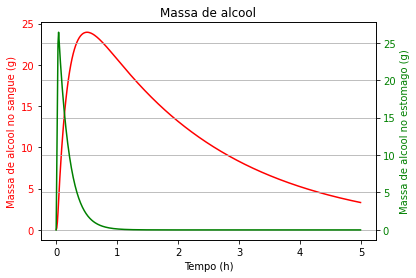

In [1]:
# Esta celula contem os códigos que geram um grafico com duas curva, uma descrevendo elolucao temporal da massa de alcool no sangue e a outra no estomago

from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

# Funcao para a implementacao do grafico com duas escalas no eixo y
def Grafico2Eixos(listax, labelx,  listay1, labely1, listay2, labely2):
       
    fig, ax1 = plt.subplots()
    ax1.plot(listax, listay2, 'r')
    ax1.set_xlabel(labelx)
    ax1.set_ylabel(labely2, color='r')
    for tl in ax1.get_yticklabels():
        tl.set_color('r')    
    ax2 = ax1.twinx()
    ax2.plot(listax, listay1, 'g')
    ax2.set_ylabel(labely1, color='g')
    for tl in ax2.get_yticklabels():
        tl.set_color('g')
    plt.title('Massa de alcool')
    plt.grid(True)
    #plt.show() 
    
   
    
# Funcao do fluxo de alcool que entra no sistema
def fluxo(t, dose, duracao): 
    
    if (t < duracao):
        fluxo_entrada = dose/duracao
    else:
        fluxo_entrada=0
    return fluxo_entrada

t_f1 = 1 # Tempo total de simulacao [h]
delta_t = 0.01 # Incremento de tempo [h]
dose = 30 # Dose [g]
duracao = 2/60 # Duração [h]


ka = 5.54
ke = 0.46



# Funcao das concentacoes de alcool no sangue e no estomago 
def massa_alcool(Y, t, dose, duracao):

    G=Y[0]
    S=Y[1]
    
    dGdt=fluxo(t, dose, duracao)-ka*G
    dSdt=ka*G-ke*S  
    return dGdt, dSdt

t_f2 = 5 # Tempo total de simulacao [h] 
listaT2=np.arange(0,t_f2,delta_t)
CI=[0,0]
Solucao = odeint(massa_alcool, CI, listaT2, args=(dose, duracao))
Gastro=Solucao[:,0] # Lista de volumes de alcool no estomao  [g]
Sangue=Solucao[:,1] # Lista de volumes de alcool no sangue  [g]

Grafico2Eixos(listaT2, 'Tempo (h)', Gastro,'Massa de alcool no estomago (g)', Sangue, 'Massa de alcool no sangue (g)')








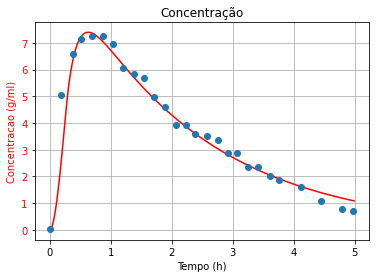

In [2]:
# Esta celula contem os códigos que geram o grafico de concentracao de alcool no sangue pelo tempo, assim como os dados do experimento de validacao


from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

# Funcao para a implementacao do grafico com duas escalas no eixo y
def Grafico2Eixos(listax, labelx,  listay1, labely1, listay2, labely2):
       
    fig, ax1 = plt.subplots()
    ax1.plot(listax, listay2, 'r')
    ax1.set_xlabel(labelx)
    ax1.set_ylabel(labely2, color='r')
    for tl in ax1.get_yticklabels():
        tl.set_color('r')    
    plt.grid(True)
    

    # aqui comecam os parametros para implementar os dados da validacao ao grafico do modelo
    lista_x_validacao = [ 26.420722135007864, 36.56200941915229, 48.571428571428584, 57.111459968602844, 67.25274725274727, 78.4615384615385, 88.06907378335953,97.94348508634226, 108.35164835164838, 119.02668759811621, 128.63422291993723, 139.30926216640506, 149.98430141287287, 159.59183673469394, 169.19937205651496,180.40816326530606,191.08320251177398,201.22448979591843,210.2982731554161,220.97331240188387,231.1145996860283,242.32339089481954,251.9309262166406,273.01412872841445,293.02982731554175,313.8461538461539,324.52119309262173]
    lista_y_validacao = [ 0.4033613445378279, 50.554621848739494, 65.74789915966387, 71.39495798319328, 72.73949579831933, 72.47058823529412, 69.51260504201682, 60.77310924369748, 58.487394957983, 56.87394957983194, 49.88235294117647, 45.84873949579833, 39.12605042016807, 39.39495798319328, 35.76470588235294, 35.09243697478993, 33.47899159663865, 28.90756302521008, 28.90756302521008, 23.5294117647059, 23.5294117647059, 20.302521008403374, 18.689075630252105, 16.000000000000014, 10.890756302521012, 7.798319327731093, 7.12605042016807]
    # convercao de mg/100ml para g/ml
    lista_y_validacao_g_ml = []
    lista_x_validacao_h = []
    i=0
    while i < len(lista_x_validacao):
        lista_y_validacao_g_ml.append(lista_y_validacao[i]*100/1000)
        lista_x_validacao_h.append((lista_x_validacao[i]-26)/60)
        i+=1
    plt.plot(lista_x_validacao_h, lista_y_validacao_g_ml, 'o')
    plt.title('Concentração')
    plt.xlabel('Tempo (h)')
    plt.ylabel('Concentracao (g/ml)')
    plt.show()
    # aqui terminam os parametros para implementar os dados da validacao ao grafico do modelo
    
    
# Funcao do fluxo de alcool que entra no sistema
def fluxo(t, dose, duracao): 
    
    if (t < duracao):
        fluxo_entrada = dose/duracao
    else:
        fluxo_entrada=0
    return fluxo_entrada

t_f1 = 1 # Tempo total de simulacao [h]
delta_t = 0.01 # Incremento de tempo [h]
dose = 30 # Dose [g]
duracao = 15/60 # Duração [h]
listaT1=np.arange(0,t_f1,delta_t)


ka = 5.54
ke = 0.46


# Funcao das concentacoes de alcool no sangue e no estomago 
def massa_alcool(Y, t, dose, duracao):

    G=Y[0]
    S=Y[1]
    
    dGdt= fluxo(t, dose, duracao)-ka*G
    dSdt=ka*G-ke*S  
    return dGdt, dSdt

t_f2 = 5 # Tempo total de simulacao [h] 
listaT2=np.arange(0,t_f2,delta_t)
CI=[0,0]
Solucao = odeint(massa_alcool, CI, listaT2, args=(dose, duracao))
Gastro=Solucao[:,0] # Lista de volumes de alcool no estomao  [g]
Sangue=Solucao[:,1] # Lista de volumes de alcool no sangue  [g]



# Calculo do volume de didtribuicao
concentracao_max = 7.4 # [g/ml ]    valor maximo do grafico de validacao
Vd = max(Sangue)/concentracao_max   # [ml]


# Implementacao do grafico de concntracoes
Gastro_concentracao = []
Sangue_concentracao = []

i=0
while i < len(Gastro):
    Gastro_concentracao.append(Gastro[i]/Vd)
    Sangue_concentracao.append(Sangue[i]/Vd)
    i+=1
Grafico2Eixos(listaT2, 'Tempo (h)', Gastro_concentracao,'Concentracao de alcool no estomago (g/ml)', Sangue_concentracao, 'Concentracao de alcool no sangue (g/ml)')


[]


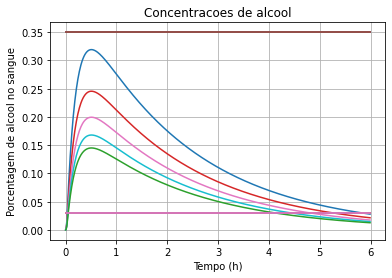

In [3]:
# Esta celula contem os códigos que geram o grafico de porcentagem de alccol no sangue pelo tempo, com massa da pessoa variando 


# Grafico base para o grafico conclusivo
# massa variando
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np


# Funcao do fluxo de alcool que entra no sistema
def fluxo(t, dose, duracao): 
    
    if (t < duracao):
        fluxo_entrada = dose/duracao
    else:
        fluxo_entrada=0
    return fluxo_entrada

t_f1 = 1 # Tempo total de simulacao [h]
delta_t = 0.01 # Incremento de tempo [h]
dose = 15 # Dose [g]
duracao = 2/60 # Duração [h]
listaT1=np.arange(0,t_f1,delta_t)


ka = 5.54 
ke = 0.46


# Funcao das concentacoes de alcool no sangue e no estomago 
def massa_alcool(Y, t, dose, duracao):

    G=Y[0]
    S=Y[1]
    
    dGdt=fluxo(t, dose, duracao)-ka*G
    dSdt=ka*G-ke*S  
    return dGdt, dSdt

t_f2 = 6 # Tempo total de simulacao [h] 
listaT2=np.arange(0,t_f2,delta_t)
CI=[0,0]
Solucao = odeint(massa_alcool, CI, listaT2, args=(dose, duracao))
Gastro=Solucao[:,0] # Lista de volumes de alcool no estomao  [g]
Sangue=Solucao[:,1] # Lista de volumes de alcool no sangue  [g]






lista_m_pessoa= range(50,125,15)
lista_m_sangue= []
i=0
while i < len(lista_m_pessoa):
    lista_m_sangue.append(lista_m_pessoa[i]*(7.5/100)*1000)
    i+=1




# Implementacao do grafico de concentracoes com a massa variando 

Gastro_concentracao = []
Sangue_concentracao = []
lista_segundas_interseccoes= []
lista_primeiras_interseccoes= []


j=0
while j < len(lista_m_sangue):
    
    i=0
    while i < len(Gastro):
        Gastro_concentracao.append(Gastro[i]*(100/lista_m_sangue[j]))
        Sangue_concentracao.append(Sangue[i]*(100/lista_m_sangue[j]))
    
        i+=1
    plt.plot(listaT2,Sangue_concentracao)
    plt.grid(True)
    plt.title('Concentracoes de alcool')
    plt.xlabel('Tempo (h)')
    plt.ylabel('Porcentagem de alcool no sangue')
    Gastro_concentracao = []
    
    
    Sangue_concentracao = []
    limite_coma= [0.35]*int(t_f2/delta_t)
    limite_euforia= [0.03]*int(t_f2/delta_t)
    plt.plot(listaT2, limite_coma)
    plt.plot(listaT2, limite_euforia)
#    tentativa falha de obter os valores de tempo nas interseccoes das curvas com a reta limite
#    w=0
#    while w < len(Sangue_concentracao):
#        if Sangue_concentracao[w] <= limite_euforia and Sangue_concentracao[w-1] >= limite_euforia:
#            lista_segundas_interseccoes.append(listaT2[w])
#        w+=1

    j+=1





# Limites da janela 

limite_coma= [0.35]*int(t_f2/delta_t)
limite_entorpecimento= [0.25]*int(t_f2/delta_t)
limite_confusao= [0.18]*int(t_f2/delta_t)
limite_excitacao= [0.09]*int(t_f2/delta_t)
limite_euforia= [0.03]*int(t_f2/delta_t)

plt.plot(listaT2, limite_coma)
#plt.plot(listaT2, limite_entorpecimento)
#plt.plot(listaT2, limite_confusao)
#plt.plot(listaT2, limite_excitacao)
plt.plot(listaT2, limite_euforia)


print(lista_segundas_interseccoes)



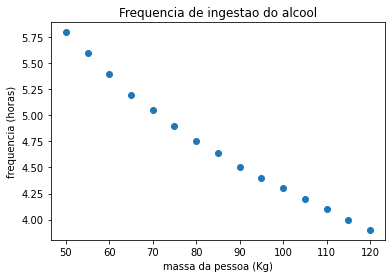

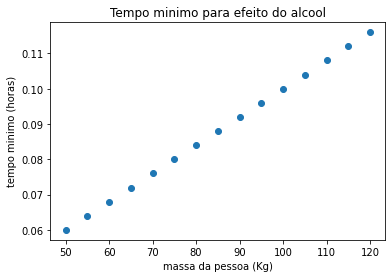

In [7]:
# Graficos conclusivos 
# Esta celula contem os códigos que geram o grafico de tempo minimo para ação dos efeitos do alcol pela massa da pessoa e a frequencia de ingestao pela massa da pessoa 


import matplotlib.pyplot as plt
import numpy as np

#por problemas na função que armazena os tempos mínimos e intervalos de tempo, eu tive que extrair do grafico as valores manualmente

deltas_t= [5.8, 5.6, 5.4, 5.2, 5.05, 4.9, 4.75, 4.64, 4.5, 4.4, 4.3, 4.2, 4.1, 4, 3.9]
lista_m_pessoa= range(50,125,5)

plt.plot(lista_m_pessoa, deltas_t, 'o')
plt.title('Frequencia de ingestao do alcool')
plt.xlabel('massa da pessoa (Kg)')
plt.ylabel('frequencia (horas)')
plt.show()

lista_m_pessoa= range(50,125,5)
lista_t_min_h= range(0, 15)
# essa lista simula as medicoes manuais feitas nos graficos 
lista_t_min_mim= np.arange(0.06, 0.12, 0.004)


plt.plot(lista_m_pessoa, lista_t_min_mim, 'o')
plt.title('Tempo minimo para efeito do alcool')
plt.xlabel('massa da pessoa (Kg)')
plt.ylabel('tempo minimo (horas)')
plt.show()
